# Predicting whether a new set of clients will subscribe the term deposit using an ANN(Deep Learning) model.

# Table Of Contents:
####   1. Importing the required libraries
####   2. Importing dataset and checking the data
####   3. Data Visualization
####   4. Data Preprocessing 
####   5. Creating the train and test data set
####   6. Building an artificial neural network model
####   7. Predicting the output of 2 custom variables

# 1. Importing the required libraries

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

# 2. Importing dataset and checking the data¶

In [4]:
deposit_df = pd.read_csv(r"D:\001_Data\Not Completed\Term Deposit\termDeposit.csv")

In [5]:
deposit_df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [6]:
deposit_df.tail()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no
31646,14156,55,management,divorced,secondary,no,204,yes,no,cellular,11,jul,1973,2,-1,0,unknown,yes


In [7]:
deposit_df.shape

(31647, 18)

In [8]:
deposit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


In [9]:
deposit_df.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [10]:
deposit_df.isnull().any()

ID            False
age           False
job           False
marital       False
education     False
default       False
balance       False
housing       False
loan          False
contact       False
day           False
month         False
duration      False
campaign      False
pdays         False
previous      False
poutcome      False
subscribed    False
dtype: bool

# 3. Data Visualization

Text(0, 0.5, 'AGE COUNT')

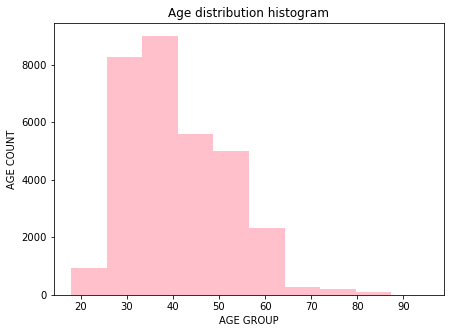

In [27]:
plt.figure(figsize=(7,5))
age_hist = plt.hist(deposit_df['age'], bins=10, color='pink')
plt.title('Age distribution histogram')
plt.xlabel('AGE GROUP')
plt.ylabel('AGE COUNT')

Text(0, 0.5, 'AGE COUNT')

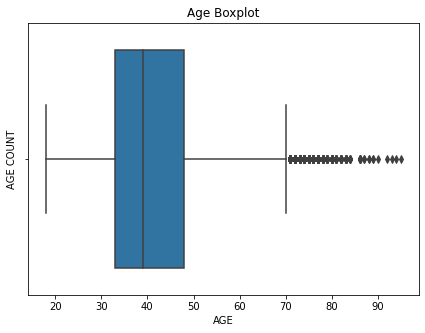

In [28]:
plt.figure(figsize=(7,5))
sns.boxplot(x='age', data=deposit_df)
plt.title('Age Boxplot')
plt.xlabel('AGE')
plt.ylabel('AGE COUNT')

Text(0, 0.5, 'JOB COUNT')

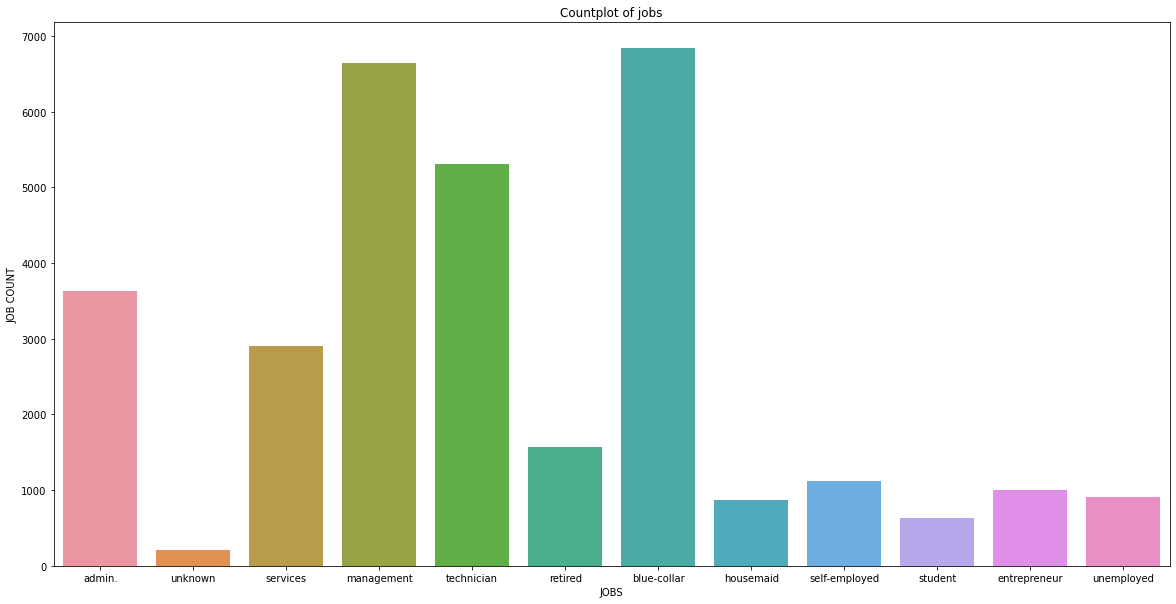

In [29]:
plt.figure(figsize=(20,10))
sns.countplot(x='job', data=deposit_df)
plt.title('Countplot of jobs')
plt.xlabel('JOBS')
plt.ylabel('JOB COUNT')

Text(0, 0.5, 'COUNT')

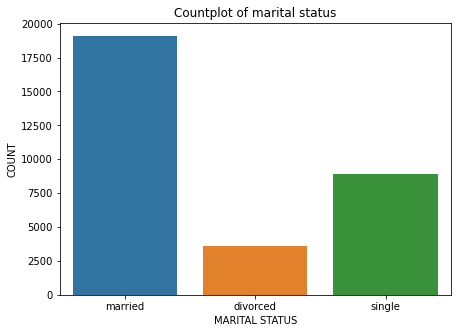

In [31]:
plt.figure(figsize=(7,5))
sns.countplot(x='marital', data=deposit_df)
plt.title('Countplot of marital status')
plt.xlabel('MARITAL STATUS')
plt.ylabel('COUNT')

Text(0, 0.5, 'COUNT')

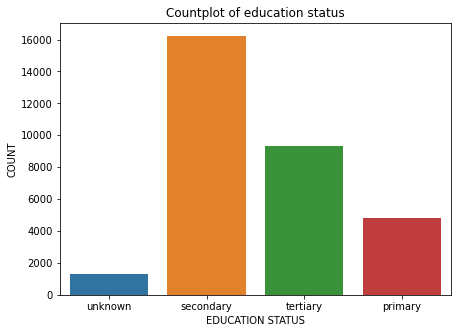

In [32]:
plt.figure(figsize=(7,5))
sns.countplot(x='education', data=deposit_df)
plt.title('Countplot of education status')
plt.xlabel('EDUCATION STATUS')
plt.ylabel('COUNT')

Text(0, 0.5, 'COUNT')

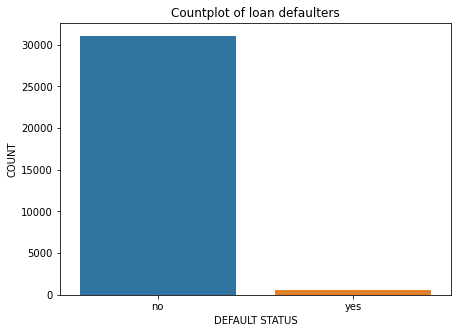

In [33]:
plt.figure(figsize=(7,5))
sns.countplot(x='default', data=deposit_df)
plt.title('Countplot of loan defaulters')
plt.xlabel('DEFAULT STATUS')
plt.ylabel('COUNT')

Text(0, 0.5, 'COUNT')

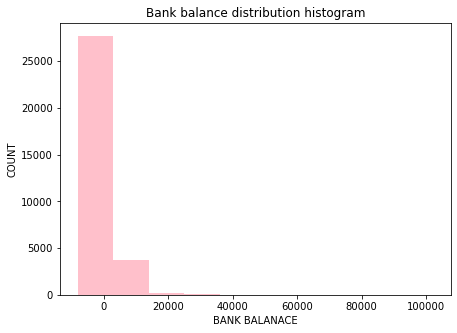

In [34]:
plt.figure(figsize=(7,5))
age_hist = plt.hist(deposit_df['balance'], bins=10, color='pink')
plt.title('Bank balance distribution histogram')
plt.xlabel('BANK BALANACE')
plt.ylabel('COUNT')

Text(0, 0.5, 'COUNT')

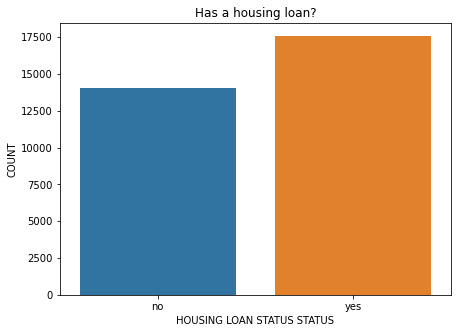

In [35]:
plt.figure(figsize=(7,5))
sns.countplot(x='housing', data=deposit_df)
plt.title('Has a housing loan?')
plt.xlabel('HOUSING LOAN STATUS STATUS')
plt.ylabel('COUNT')

Text(0, 0.5, 'COUNT')

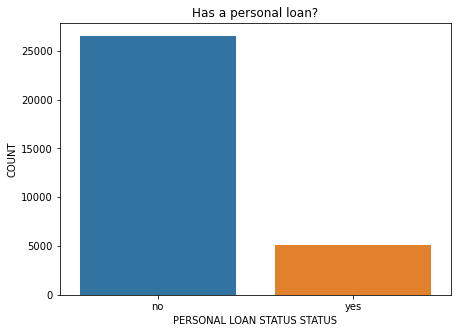

In [36]:
plt.figure(figsize=(7,5))
sns.countplot(x='loan', data=deposit_df)
plt.title('Has a personal loan?')
plt.xlabel('PERSONAL LOAN STATUS STATUS')
plt.ylabel('COUNT')

Text(0, 0.5, 'COUNT')

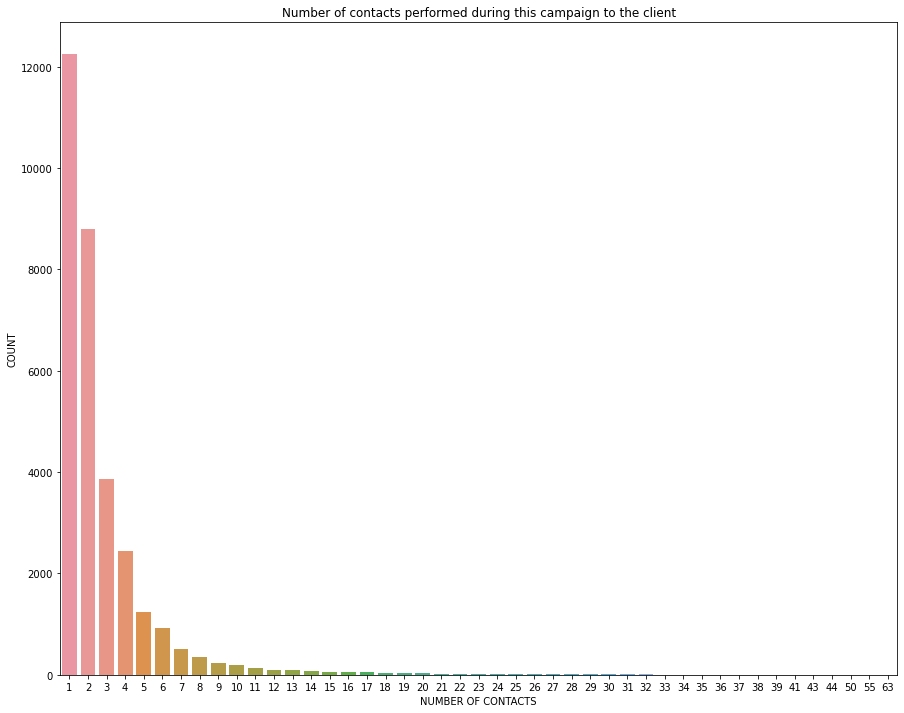

In [40]:
plt.figure(figsize=(15,12))
sns.countplot(x='campaign', data=deposit_df)
plt.title('Number of contacts performed during this campaign to the client')
plt.xlabel('NUMBER OF CONTACTS')
plt.ylabel('COUNT')

Text(0, 0.5, 'COUNT')

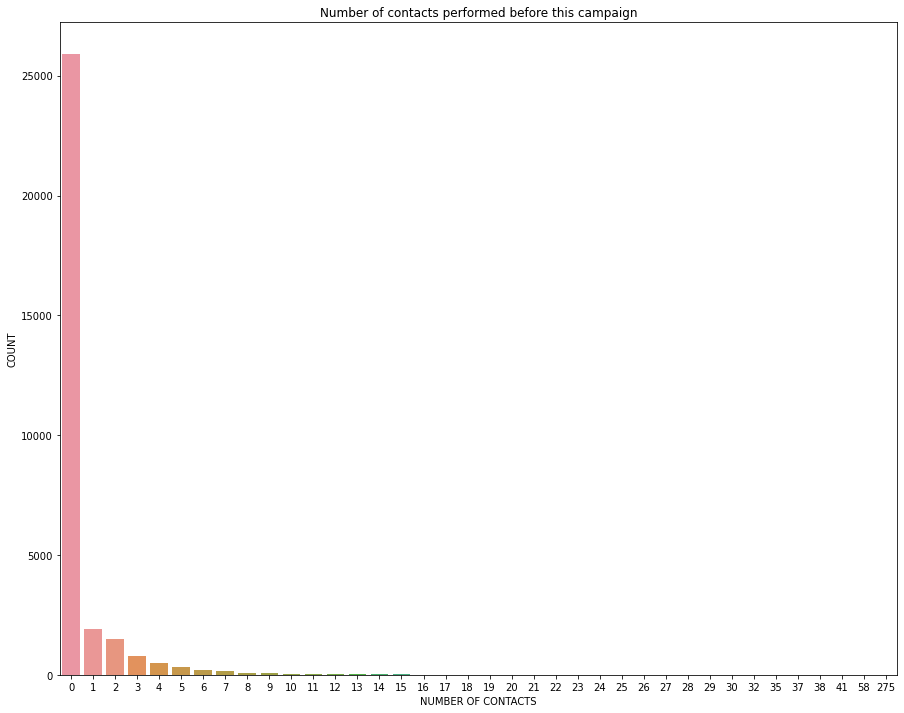

In [44]:
plt.figure(figsize=(15,12))
sns.countplot(x='previous', data=deposit_df)
plt.title('Number of contacts performed before this campaign')
plt.xlabel('NUMBER OF CONTACTS')
plt.ylabel('COUNT')

Text(0, 0.5, 'COUNT')

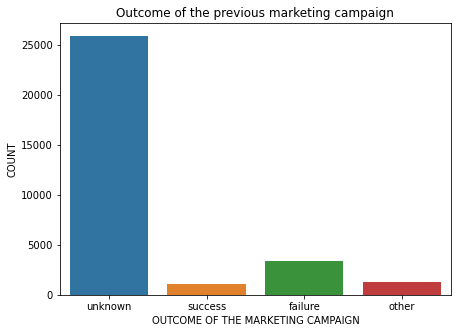

In [45]:
plt.figure(figsize=(7,5))
sns.countplot(x='poutcome', data=deposit_df)
plt.title('Outcome of the previous marketing campaign')
plt.xlabel('OUTCOME OF THE MARKETING CAMPAIGN')
plt.ylabel('COUNT')

Text(0, 0.5, 'COUNT')

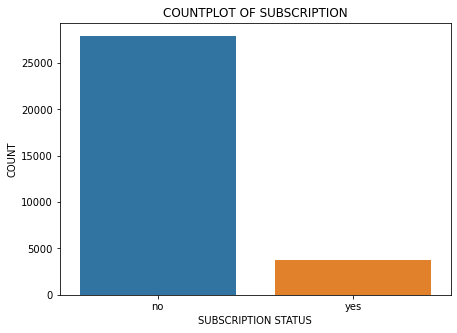

In [48]:
plt.figure(figsize=(7,5))
sns.countplot(x='subscribed', data=deposit_df)
plt.title('COUNTPLOT OF SUBSCRIPTION')
plt.xlabel('SUBSCRIPTION STATUS')
plt.ylabel('COUNT')

# 4. Data Preprocessing

In [49]:
deposit_df.head()

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [50]:
#dropping ID column as it's not useful for the model
deposit_df.drop('ID', axis=1, inplace=True)

In [51]:
deposit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         31647 non-null  int64 
 1   job         31647 non-null  object
 2   marital     31647 non-null  object
 3   education   31647 non-null  object
 4   default     31647 non-null  object
 5   balance     31647 non-null  int64 
 6   housing     31647 non-null  object
 7   loan        31647 non-null  object
 8   contact     31647 non-null  object
 9   day         31647 non-null  int64 
 10  month       31647 non-null  object
 11  duration    31647 non-null  int64 
 12  campaign    31647 non-null  int64 
 13  pdays       31647 non-null  int64 
 14  previous    31647 non-null  int64 
 15  poutcome    31647 non-null  object
 16  subscribed  31647 non-null  object
dtypes: int64(7), object(10)
memory usage: 4.1+ MB


In [52]:
#Converting categorical values to numerical values

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [53]:
deposit_df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'subscribed'],
      dtype='object')

In [54]:
categorical_variables = ['job', 'marital', 'education', 'default', 'housing',
       'loan', 'poutcome', 'subscribed']

for variables in categorical_variables:
    deposit_df[variables] = le.fit_transform(deposit_df[variables])

In [55]:
deposit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   age         31647 non-null  int64 
 1   job         31647 non-null  int32 
 2   marital     31647 non-null  int32 
 3   education   31647 non-null  int32 
 4   default     31647 non-null  int32 
 5   balance     31647 non-null  int64 
 6   housing     31647 non-null  int32 
 7   loan        31647 non-null  int32 
 8   contact     31647 non-null  object
 9   day         31647 non-null  int64 
 10  month       31647 non-null  object
 11  duration    31647 non-null  int64 
 12  campaign    31647 non-null  int64 
 13  pdays       31647 non-null  int64 
 14  previous    31647 non-null  int64 
 15  poutcome    31647 non-null  int32 
 16  subscribed  31647 non-null  int32 
dtypes: int32(8), int64(7), object(2)
memory usage: 3.1+ MB


In [56]:
#dropping 3 vars as they'll not be useful to train the model
deposit_df.drop(['contact', 'day', 'month'], axis=1, inplace=True)

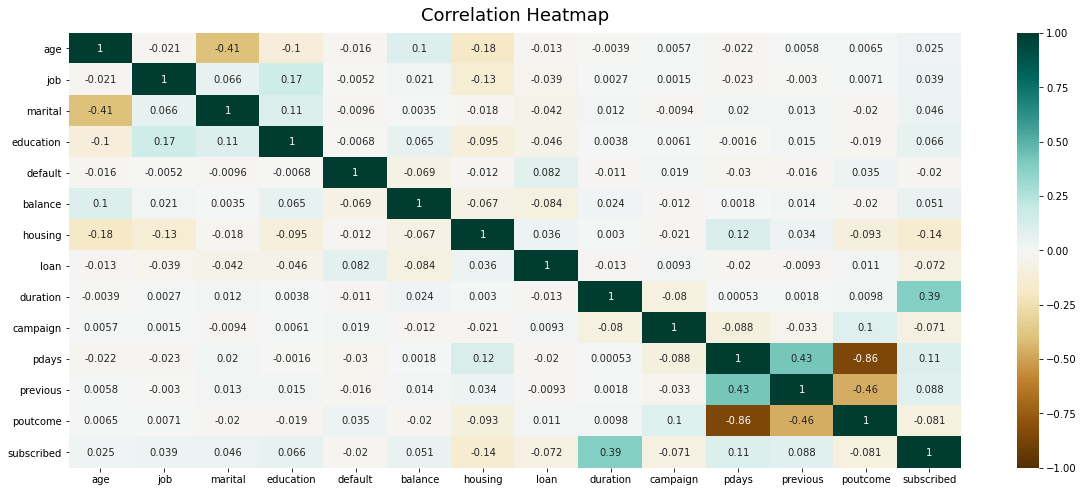

In [57]:
plt.figure(figsize=(20, 8))
heatmap = sns.heatmap(deposit_df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

# 5. Creating the train and test data set

In [58]:
X = deposit_df.drop('subscribed', axis=1)

In [59]:
y = deposit_df['subscribed']

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [62]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [63]:
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

# 6. Building an artificial neural network model

In [69]:
#INITIALIZING THE ANN MODEL

ann_model = tf.keras.models.Sequential()

In [70]:
#ADDING THE INPUT LAYER AND 1st HIDDEN LAYER

ann_model.add(tf.keras.layers.Dense(units=6, activation = 'relu'))

In [71]:
#ADDING THE 2nd HIDDEN LAYER

ann_model.add(tf.keras.layers.Dense(units = 6, activation = 'relu'))

In [72]:
#ADDING THE OUTPUT LAYER

ann_model.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

In [73]:
#COMPILING THE ANN MODEL

ann_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [74]:
#FITTING THE ANN MODEL ON THE TRAINING SET

ann_model.fit(X_train, y_train, batch_size = 32, epochs = 150)

Epoch 1/150
693/693 [==============================] - 0s 711us/step - loss: 0.3451 - accuracy: 0.8716
Epoch 2/150
693/693 [==============================] - 0s 714us/step - loss: 0.2660 - accuracy: 0.8845
Epoch 3/150
693/693 [==============================] - 0s 680us/step - loss: 0.2569 - accuracy: 0.8846
Epoch 4/150
693/693 [==============================] - 1s 802us/step - loss: 0.2524 - accuracy: 0.8848
Epoch 5/150
693/693 [==============================] - 0s 705us/step - loss: 0.2495 - accuracy: 0.8864
Epoch 6/150
693/693 [==============================] - 1s 725us/step - loss: 0.2473 - accuracy: 0.8968
Epoch 7/150
693/693 [==============================] - 1s 792us/step - loss: 0.2456 - accuracy: 0.8975
Epoch 8/150
693/693 [==============================] - 1s 760us/step - loss: 0.2447 - accuracy: 0.8979
Epoch 9/150
693/693 [==============================] - 1s 933us/step - loss: 0.2436 - accuracy: 0.8978
Epoch 10/150
693/693 [==============================] - 1s 901us/step - l

693/693 [==============================] - 1s 1ms/step - loss: 0.2358 - accuracy: 0.9014
Epoch 81/150
693/693 [==============================] - 1s 2ms/step - loss: 0.2356 - accuracy: 0.9015
Epoch 82/150
693/693 [==============================] - 1s 2ms/step - loss: 0.2358 - accuracy: 0.9012
Epoch 83/150
693/693 [==============================] - 1s 1ms/step - loss: 0.2357 - accuracy: 0.9021
Epoch 84/150
693/693 [==============================] - 0s 680us/step - loss: 0.2356 - accuracy: 0.9006
Epoch 85/150
693/693 [==============================] - 1s 744us/step - loss: 0.2355 - accuracy: 0.9010
Epoch 86/150
693/693 [==============================] - 0s 695us/step - loss: 0.2354 - accuracy: 0.9020
Epoch 87/150
693/693 [==============================] - 0s 657us/step - loss: 0.2357 - accuracy: 0.9016
Epoch 88/150
693/693 [==============================] - 0s 675us/step - loss: 0.2355 - accuracy: 0.9010
Epoch 89/150
693/693 [==============================] - 0s 664us/step - loss: 0.2356 

# 7. Predicting the output of 2 custom variables

In [76]:
deposit_df.head()

,age,job,marital,education,default,balance,housing,loan,duration,campaign,pdays,previous,poutcome,subscribed
0,56,0,1,3,0,1933,0,0,44,2,-1,0,3,0
1,31,11,1,1,0,3,0,0,91,2,-1,0,3,0
2,27,7,1,1,0,891,1,0,240,1,-1,0,3,0
3,57,4,0,2,0,3287,0,0,867,1,84,3,2,1
4,31,9,1,1,0,119,1,0,380,1,-1,0,3,0


In [78]:
print("Customer 1:",  ann_model.predict(sc.transform([[35, 4, 1, 2, 0, 1500, 1, 0, 100, 2, -10, 3, 2]])) > 0.5)

Customer 1: [[False]]


In [80]:
print("Customer 2:",  ann_model.predict(sc.transform([[30, 6, 1, 3, 0, 2500, 0, 0, 300, 5, 10, 2, 2]])) > 0.5)

Customer 2: [[ True]]
